In [299]:
import pandas, seaborn, scipy, numpy, matplotlib, sklearn

%matplotlib inline
from matplotlib import pyplot

# Constants
library_sizes = {
    'WGS': 3002000000,
    'WES': 50160183,
}
mhc_binding_threshold_affinity = 500

def bootstrap(values, statistic=numpy.mean, samples=5000):
    values = pandas.Series(values).dropna()
    if len(values) <= 1:
        return (numpy.nan, numpy.nan)
    values = [statistic(sklearn.utils.resample(values)) for i in range(samples)]
    return (numpy.percentile(values, 5), numpy.percentile(values, 95))

def mean_with_errorbars(values):
    bars = bootstrap(values)
    if numpy.nan in bars:
        return "%0.1f" % numpy.mean(values)
    return "%0.1f (%0.1f - %0.1f)" % ((numpy.mean(values),) + bars)


In [112]:
sources = pandas.read_csv("../data/sources.csv", index_col="source_id")
timepoint_paired_donors = set(d for d in sources.donor
                              if len(sources.ix[sources.donor == d].timepoint.unique()) > 1 )
timepoint_paired_donors
sources["timepoint_paired"] = sources.donor.isin(timepoint_paired_donors)
sources

,donor,cohort,library,treated,timepoint,metastasis,tissue_type,interval_days,assay,paired,timepoint_paired
source_id,,,,,,,,,,,
AOCS-001-1/SP101515,AOCS-001,AOCS,WGS,False,primary,False,solid,0,WGS,False,False
AOCS-002-1/SP101517,AOCS-002,AOCS,WGS,False,primary,False,solid,0,WGS,False,False
AOCS-004-1/SP101519,AOCS-004,AOCS,WGS,False,primary,False,solid,0,WGS,False,False
AOCS-005-1/SP101521,AOCS-005,AOCS,WGS,False,primary,False,solid,0,WGS,False,False
AOCS-034-13/SP101524,AOCS-034,AOCS,WGS,True,recurrence,False,ascites,1597,WGS,True,True
AOCS-034-1/SP101523,AOCS-034,AOCS,WGS,False,primary,False,solid,0,WGS,True,True
AOCS-055-1/SP101526,AOCS-055,AOCS,WGS,False,primary,False,solid,0,WGS,False,False
AOCS-056-1/SP101528,AOCS-056,AOCS,WGS,False,primary,False,solid,0,WGS,False,False
AOCS-057-1/SP101530,AOCS-057,AOCS,WGS,False,primary,False,solid,0,WGS,False,False


In [122]:
mutations = pandas.read_csv("../data/mutations.csv.bz2")

mutations["indel"] = mutations.ref.str.len() != mutations.alt.str.len()
#mutations["interesting"] = (mutations.context_mutation_3p5p == "C(C>A)C").astype(float)
mutations["interesting"] = (mutations.context_mutation == "C>A").astype(float)

mutations["interesting"].mean()

muts_confident = mutations.ix[
    (mutations.called == 1) | (mutations.dna_alt_reads > 10)
]


In [125]:
sources["protein changing"] = muts_confident.ix[
    (mutations.effect.str.startswith("p."))
].groupby("source_id").donor.count().to_frame()["donor"]

sources["neoantigens"] = muts_confident.ix[
    (mutations.binding_affinity < 500)
].groupby("source_id").donor.count().to_frame()["donor"]

sources["peptides"] = muts_confident.groupby("source_id").num_binders.sum().to_frame()["num_binders"]

sources["expressed peptides"] = muts_confident.ix[
    (muts_confident.rna_alt_reads > 2)
].groupby("source_id").num_binders.sum().to_frame()["num_binders"]


sources["expressed neoantigens"] = muts_confident.ix[
    (muts_confident.binding_affinity < 500) & (muts_confident.rna_alt_reads > 2)
].groupby("source_id").donor.count().to_frame()["donor"]



sources["mutations"] = muts_confident.groupby("source_id").donor.count().to_frame()["donor"]
sources["mutations_per_mb"] = sources.mutations * 1e6 / sources.library.map(library_sizes)

sources["indel"] = muts_confident.ix[
    muts_confident.indel
].groupby("source_id").donor.count().to_frame()["donor"]
sources.indel = sources.indel.fillna(0)

sources["interesting mutations"] = muts_confident.groupby("source_id").interesting.mean().to_frame()["interesting"] * 100.0

sources["group"] = sources.cohort + " " + sources.tissue_type
sources["treatment"] = sources.treated.map({True: "chemo treated", False: "treatment naive"})

sources

,donor,cohort,library,treated,timepoint,metastasis,tissue_type,interval_days,assay,paired,...,neoantigens,peptides,expressed neoantigens,mutations,mutations_per_mb,indel,interesting mutations,group,treatment,expressed peptides
source_id,,,,,,,,,,,,,,,,,,,,,
AOCS-001-1/SP101515,AOCS-001,AOCS,WGS,False,primary,False,solid,0,WGS,False,...,42,155,25,5937,1.977682,1,19.302678,AOCS solid,treatment naive,90
AOCS-002-1/SP101517,AOCS-002,AOCS,WGS,False,primary,False,solid,0,WGS,False,...,10,51,NaN,1532,0.510326,0,17.297650,AOCS solid,treatment naive,NaN
AOCS-004-1/SP101519,AOCS-004,AOCS,WGS,False,primary,False,solid,0,WGS,False,...,31,75,15,6786,2.260493,1,16.931919,AOCS solid,treatment naive,31
AOCS-005-1/SP101521,AOCS-005,AOCS,WGS,False,primary,False,solid,0,WGS,False,...,32,91,21,5703,1.899734,2,15.640891,AOCS solid,treatment naive,60
AOCS-034-13/SP101524,AOCS-034,AOCS,WGS,True,recurrence,False,ascites,1597,WGS,True,...,92,332,56,13626,4.538974,5,17.906943,AOCS ascites,chemo treated,174
AOCS-034-1/SP101523,AOCS-034,AOCS,WGS,False,primary,False,solid,0,WGS,True,...,54,210,25,6913,2.302798,4,18.429047,AOCS solid,treatment naive,79
AOCS-055-1/SP101526,AOCS-055,AOCS,WGS,False,primary,False,solid,0,WGS,False,...,66,226,35,15112,5.033977,0,11.348597,AOCS solid,treatment naive,113
AOCS-056-1/SP101528,AOCS-056,AOCS,WGS,False,primary,False,solid,0,WGS,False,...,39,329,6,7102,2.365756,1,20.909603,AOCS solid,treatment naive,22
AOCS-057-1/SP101530,AOCS-057,AOCS,WGS,False,primary,False,solid,0,WGS,False,...,40,198,NaN,6201,2.065623,5,19.593614,AOCS solid,treatment naive,NaN


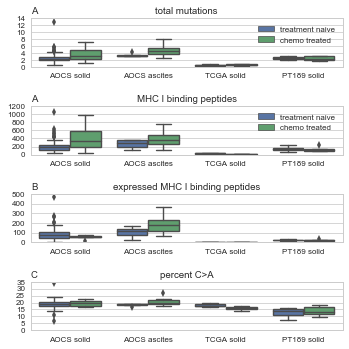

In [131]:
def format_figure():
    pyplot.xlabel("")
    pyplot.legend().remove()
    pyplot.ylim(ymin=0)

seaborn.set_context("paper")
seaborn.set_style("whitegrid")

pyplot.figure(figsize=(5,5))
grid=(4,1)
i = 0

ax = pyplot.subplot2grid(grid,(i, 0), colspan=2)
pyplot.title("A", loc="left")
seaborn.boxplot(data=sources, x="group", y="mutations_per_mb", hue="treatment", hue_order=("treatment naive", "chemo treated"))
format_figure()
pyplot.legend(loc="upper right")
pyplot.title("total mutations")
pyplot.ylabel("")
i += 1

ax = pyplot.subplot2grid(grid,(i, 0), colspan=2)
pyplot.title("A", loc="left")
seaborn.boxplot(data=sources, x="group", y="peptides", hue="treatment", hue_order=("treatment naive", "chemo treated"))
format_figure()
pyplot.legend(loc="upper right")
pyplot.title("MHC I binding peptides")
pyplot.ylabel("")
i += 1

ax = pyplot.subplot2grid(grid,(i, 0))
#pyplot.title("Expressed mutations")
pyplot.title("B", loc="left")
#sub_data = sources[sources.cohort != "TCGA"]
sub_data = sources
seaborn.boxplot(data=sub_data, x="group", y="expressed peptides", hue="treatment", hue_order=("treatment naive", "chemo treated"))
format_figure()
pyplot.title("expressed MHC I binding peptides")
pyplot.ylabel("")
i += 1


ax = pyplot.subplot2grid(grid,(i, 0))
pyplot.title("C", loc="left")
seaborn.boxplot(data=sources, x="group", y="interesting mutations", hue="treatment", hue_order=("treatment naive", "chemo treated"))
format_figure()
pyplot.tight_layout()
pyplot.title("percent C>A")
pyplot.ylabel("")
i += 1

pyplot.savefig("../figures/fig1.pdf")



In [154]:
(sources.ix[sources.cohort == "AOCS"].peptides / sources.ix[sources.cohort == "AOCS"].mutations).sort(inplace=False)

source_id
AOCS-083-1/SP101592     0.005300
AOCS-092-13/SP101630    0.007337
AOCS-107-1/SP101674     0.008243
AOCS-092-1/SP101628     0.008440
AOCS-144-1/SP101951     0.009590
AOCS-169-1/SP102168     0.009804
AOCS-113-1/SP101694     0.010219
AOCS-160-1/SP102084     0.010411
AOCS-004-1/SP101519     0.011052
AOCS-170-1/SP102174     0.012003
AOCS-170-12/SP102177    0.012513
AOCS-105-1/SP101666     0.013216
AOCS-059-1/SP101536     0.013231
AOCS-155-13/SP102045    0.013595
AOCS-157-1/SP102055     0.014224
AOCS-084-1/SP101596     0.014873
AOCS-055-1/SP101526     0.014955
AOCS-159-1/SP102074     0.015214
AOCS-005-1/SP101521     0.015957
AOCS-096-1/SP101654     0.016139
AOCS-123-1/SP101756     0.017657
AOCS-162-1/SP102096     0.018123
AOCS-112-1/SP101690     0.018175
AOCS-081-1/SP101588     0.018316
AOCS-148-1/SP101990     0.018694
AOCS-126-1/SP101785     0.018731
AOCS-149-1/SP102000     0.019424
AOCS-090-1/SP101616     0.019566
AOCS-171-1/SP102187     0.019808
AOCS-131-1/SP101815     0.020337


In [157]:
sources

,donor,cohort,library,treated,timepoint,metastasis,tissue_type,interval_days,assay,paired,...,neoantigens,peptides,expressed neoantigens,mutations,mutations_per_mb,indel,interesting mutations,group,treatment,expressed peptides
source_id,,,,,,,,,,,,,,,,,,,,,
AOCS-001-1/SP101515,AOCS-001,AOCS,WGS,False,primary,False,solid,0,WGS,False,...,42,155,25,5937,1.977682,1,19.302678,AOCS solid,treatment naive,90
AOCS-002-1/SP101517,AOCS-002,AOCS,WGS,False,primary,False,solid,0,WGS,False,...,10,51,NaN,1532,0.510326,0,17.297650,AOCS solid,treatment naive,NaN
AOCS-004-1/SP101519,AOCS-004,AOCS,WGS,False,primary,False,solid,0,WGS,False,...,31,75,15,6786,2.260493,1,16.931919,AOCS solid,treatment naive,31
AOCS-005-1/SP101521,AOCS-005,AOCS,WGS,False,primary,False,solid,0,WGS,False,...,32,91,21,5703,1.899734,2,15.640891,AOCS solid,treatment naive,60
AOCS-034-13/SP101524,AOCS-034,AOCS,WGS,True,recurrence,False,ascites,1597,WGS,True,...,92,332,56,13626,4.538974,5,17.906943,AOCS ascites,chemo treated,174
AOCS-034-1/SP101523,AOCS-034,AOCS,WGS,False,primary,False,solid,0,WGS,True,...,54,210,25,6913,2.302798,4,18.429047,AOCS solid,treatment naive,79
AOCS-055-1/SP101526,AOCS-055,AOCS,WGS,False,primary,False,solid,0,WGS,False,...,66,226,35,15112,5.033977,0,11.348597,AOCS solid,treatment naive,113
AOCS-056-1/SP101528,AOCS-056,AOCS,WGS,False,primary,False,solid,0,WGS,False,...,39,329,6,7102,2.365756,1,20.909603,AOCS solid,treatment naive,22
AOCS-057-1/SP101530,AOCS-057,AOCS,WGS,False,primary,False,solid,0,WGS,False,...,40,198,NaN,6201,2.065623,5,19.593614,AOCS solid,treatment naive,NaN


In [156]:
sources.ix[sources.donor == "AOCS-077"]

,donor,cohort,library,treated,timepoint,metastasis,tissue_type,interval_days,assay,paired,...,neoantigens,peptides,expressed neoantigens,mutations,mutations_per_mb,indel,interesting mutations,group,treatment,expressed peptides
source_id,,,,,,,,,,,,,,,,,,,,,
AOCS-077-1/SP101572,AOCS-077,AOCS,WGS,True,primary,False,solid,75,WGS,False,...,24,980,3,3084,1.027315,2,16.50454,AOCS solid,chemo treated,59


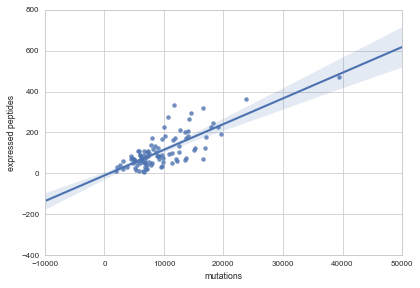

In [159]:
seaborn.regplot(sources.ix[sources.cohort == "AOCS"].mutations, sources.ix[sources.cohort == "AOCS"]["expressed peptides"])

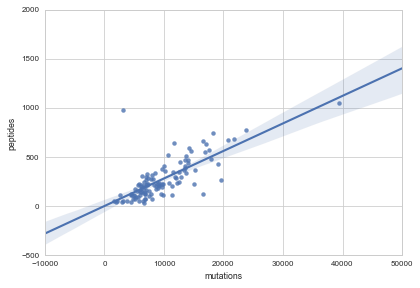

In [150]:
seaborn.regplot(sources.ix[sources.cohort == "AOCS"].mutations, sources.ix[sources.cohort == "AOCS"].peptides)

In [177]:
aocs_sources = sources.ix[sources.cohort == "AOCS"]

SyntaxError: invalid syntax (<ipython-input-177-1f7ba2bf2016>, line 1)

In [187]:
muts_confident.ix[1076674]

source_id                                              AOCS-077-1/SP101572
donor                                                             AOCS-077
called                                                                   1
genome                                                              GRCh37
contig                                                                   2
interbase_start                                                  170139453
interbase_end                                                    170139454
ref                                                                      -
alt                                                                      C
effect                                                            p.H369fs
gene                                                                  LRP2
context_5_prime                                            TGGCACAGGTGACGG
context_3_prime                                            CAGGTCGGCTTTCAC
context_mutation         

In [196]:
aocs_muts_confident = muts_confident.ix[muts_confident.donor.str.startswith("AOCS")]
aocs_muts_confident_coding = aocs_muts_confident.ix[aocs_muts_confident.effect.str.startswith("p.")]
aocs_muts_confident_coding_expressed = aocs_muts_confident_coding.ix[aocs_muts_confident_coding.rna_alt_reads > 2]

In [192]:
aocs_muts_confident.groupby(["indel", "effect"]).num_binders.sum()

indel  effect               
False  3' UTR                    0
       5' UTR                    0
       exonic-splice-site        7
       incomplete                0
       intergenic                0
       intragenic                0
       intronic                  0
       intronic-splice-site     20
       non-coding-transcript     0
       p.*126Y (stop-loss)       3
       p.*239L (stop-loss)       0
       p.*279Q (stop-loss)       2
       p.*323S (stop-loss)       0
       p.*335S (stop-loss)       1
       p.*363L (stop-loss)       0
       p.*366R (stop-loss)       3
       p.*368Y (stop-loss)       0
       p.*681C (stop-loss)       0
       p.*68R (stop-loss)        0
       p.*69Q (stop-loss)        0
       p.*97L (stop-loss)        0
       p.0? (start-loss)         0
       p.A100P                   0
       p.A100V                   4
       p.A1012T                  2
       p.A101V                   0
       p.A1026V                  2
       p.A1037D           

In [202]:
group_sum = aocs_muts_confident_coding.groupby(["snv", "indel"]).num_binders.sum()
group_count = aocs_muts_confident_coding.groupby(["snv", "indel"]).num_binders.count()
df = pandas.DataFrame({"sum": group_sum, "count": group_count, "peptides per": group_sum / group_count})
df["peptide fraction"] = df["sum"] / df["sum"].sum()
df["mut fraction"] = df["count"] / df["count"].sum()
df

count  peptides per    sum  peptide fraction  mut fraction
snv   indel                                                            
False False    294     12.312925   3620          0.117163      0.032758
      True     412      6.820388   2810          0.090947      0.045905
True  False   8269      2.958883  24467          0.791889      0.921337

In [201]:
group_sum = aocs_muts_confident_coding_expressed.groupby(["snv", "indel"]).num_binders.sum()
group_count = aocs_muts_confident_coding_expressed.groupby(["snv", "indel"]).num_binders.count()
df = pandas.DataFrame({"sum": group_sum, "count": group_count, "peptides per": group_sum / group_count})
df["peptide fraction"] = df["sum"] / df["sum"].sum()
df["mut fraction"] = df["count"] / df["count"].sum()
df

count  peptides per   sum  peptide fraction  mut fraction
snv   indel                                                           
False False     88     11.102273   977          0.091488      0.024929
      True      51      5.058824   258          0.024160      0.014448
True  False   3391      2.785019  9444          0.884352      0.960623

In [ ]:
muts_confident.num_binders

In [185]:
(muts_confident.ix[(muts_confident.donor == "AOCS-077") & (muts_confident.num_binders > 500)])

,source_id,donor,called,genome,contig,interbase_start,interbase_end,ref,alt,effect,...,binding_affinity,binding_allele,num_alt,num_ref,total_depth,binder,binding_peptides,num_binders,indel,interesting
1076674,AOCS-077-1/SP101572,AOCS-077,1,GRCh37,2,170139453,170139454,-,C,p.H369fs,...,2.78,A*02:01,0,0,0,True,"{'NCYFDETD': 43677.82, 'LAIDWAASRLY': 19.0, 'K...",829,False,0


In [183]:
(muts_confident.ix[muts_confident.donor.str.startswith("AOCS")].num_binders).describe()

count    1099184.000000
mean           0.028135
std            0.984722
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max          829.000000
Name: num_binders, dtype: float64

In [146]:
sources.ix[(sources.cohort == "AOCS") & (sources.tissue_type == "solid") & (sources.timepoint == "recurrence")]

,donor,cohort,library,treated,timepoint,metastasis,tissue_type,interval_days,assay,paired,...,neoantigens,peptides,expressed neoantigens,mutations,mutations_per_mb,indel,interesting mutations,group,treatment,expressed peptides
source_id,,,,,,,,,,,,,,,,,,,,,
AOCS-094-2/SP106641,AOCS-094,AOCS,WGS,True,recurrence,False,solid,758,WGS,True,...,93,508,22,13649,4.546636,10,18.133197,AOCS solid,chemo treated,75
AOCS-139-4/SP101906,AOCS-139,AOCS,WGS,True,recurrence,False,solid,920,WGS,True,...,147,683,NaN,21796,7.260493,11,22.279317,AOCS solid,chemo treated,NaN
AOCS-139-17/SP101901,AOCS-139,AOCS,WGS,True,recurrence,True,solid,920,WGS,True,...,125,568,NaN,17615,5.867755,13,20.346296,AOCS solid,chemo treated,NaN
AOCS-139-16/SP101896,AOCS-139,AOCS,WGS,True,recurrence,True,solid,920,WGS,True,...,149,672,NaN,20816,6.934044,9,21.935050,AOCS solid,chemo treated,NaN
AOCS-167-4/SP102151,AOCS-167,AOCS,WGS,True,recurrence,False,solid,937,WGS,False,...,58,238,NaN,9149,3.047635,2,18.854520,AOCS solid,chemo treated,NaN
AOCS-167-16/SP102148,AOCS-167,AOCS,WGS,True,recurrence,True,solid,937,WGS,False,...,52,204,NaN,8732,2.908728,3,19.892350,AOCS solid,chemo treated,NaN


In [147]:
sources.ix[(sources.cohort == "AOCS") & (sources.tissue_type == "solid") & (sources.timepoint == "primary")]

,donor,cohort,library,treated,timepoint,metastasis,tissue_type,interval_days,assay,paired,...,neoantigens,peptides,expressed neoantigens,mutations,mutations_per_mb,indel,interesting mutations,group,treatment,expressed peptides
source_id,,,,,,,,,,,,,,,,,,,,,
AOCS-001-1/SP101515,AOCS-001,AOCS,WGS,False,primary,False,solid,0,WGS,False,...,42,155,25,5937,1.977682,1,19.302678,AOCS solid,treatment naive,90
AOCS-002-1/SP101517,AOCS-002,AOCS,WGS,False,primary,False,solid,0,WGS,False,...,10,51,NaN,1532,0.510326,0,17.297650,AOCS solid,treatment naive,NaN
AOCS-004-1/SP101519,AOCS-004,AOCS,WGS,False,primary,False,solid,0,WGS,False,...,31,75,15,6786,2.260493,1,16.931919,AOCS solid,treatment naive,31
AOCS-005-1/SP101521,AOCS-005,AOCS,WGS,False,primary,False,solid,0,WGS,False,...,32,91,21,5703,1.899734,2,15.640891,AOCS solid,treatment naive,60
AOCS-034-1/SP101523,AOCS-034,AOCS,WGS,False,primary,False,solid,0,WGS,True,...,54,210,25,6913,2.302798,4,18.429047,AOCS solid,treatment naive,79
AOCS-055-1/SP101526,AOCS-055,AOCS,WGS,False,primary,False,solid,0,WGS,False,...,66,226,35,15112,5.033977,0,11.348597,AOCS solid,treatment naive,113
AOCS-056-1/SP101528,AOCS-056,AOCS,WGS,False,primary,False,solid,0,WGS,False,...,39,329,6,7102,2.365756,1,20.909603,AOCS solid,treatment naive,22
AOCS-057-1/SP101530,AOCS-057,AOCS,WGS,False,primary,False,solid,0,WGS,False,...,40,198,NaN,6201,2.065623,5,19.593614,AOCS solid,treatment naive,NaN
AOCS-058-1/SP101532,AOCS-058,AOCS,WGS,False,primary,False,solid,0,WGS,False,...,72,216,19,9199,3.064290,8,23.263398,AOCS solid,treatment naive,72


In [ ]:
sources.ix[(sources.cohort == "AOCS") & (sources.tissue_type == "solid") & (sources.timepoint == "recurrence")]

In [259]:
scipy.__version__

'0.17.0'

AOCS
('AOCS', 'ascites', 'mutations_per_mb', MannwhitneyuResult(statistic=22.0, pvalue=0.081990321000382935))
('AOCS', 'ascites', 'peptides', MannwhitneyuResult(statistic=30.0, pvalue=0.21746822614354233))
('AOCS', 'ascites', 'expressed peptides', MannwhitneyuResult(statistic=18.0, pvalue=0.046318382325934111))
('AOCS', 'solid', 'mutations_per_mb', MannwhitneyuResult(statistic=296.5, pvalue=0.059658586654382208))
('AOCS', 'solid', 'peptides', MannwhitneyuResult(statistic=268.5, pvalue=0.025879388199249044))
('AOCS', 'solid', 'expressed peptides', MannwhitneyuResult(statistic=272.0, pvalue=0.028883487607375854))


,cohort,item,num treated,num untreated,p-value,tissue_type,treated,treated range,untreated,untreated range
0,AOCS,mutations_per_mb,24,4,0.081990,ascites,4.582625,"(4.14480277038, 5.03896777149)",3.443038,"(3.1869586942, 3.70369753498)"
1,AOCS,peptides,24,4,0.217468,ascites,386.708333,"(329.622916667, 445.752083333)",267.250000,"(177.25, 357.75)"
2,AOCS,expressed peptides,20,4,0.046318,ascites,190.900000,"(159.0, 222.305)",105.750000,"(60.5, 147.25)"
3,AOCS,mutations_per_mb,12,75,0.059659,solid,3.747335,"(2.81971463469, 4.70957417277)",2.632365,"(2.338005996, 2.96046013769)"
4,AOCS,peptides,12,75,0.025879,solid,399.750000,"(274.079166667, 535.2625)",210.386667,"(181.585333333, 243.656)"
5,AOCS,expressed peptides,5,69,0.028883,solid,53.600000,"(35.8, 66.6)",89.637681,"(75.7528985507, 104.565217391)"


In [302]:
sub_sources = sources[(sources.tissue_type == "solid") & (sources.cohort == "AOCS")]
sub_sources[sub_sources.treated]
bootstrap(sub_sources[sub_sources.treated][item])
sub_sources.ix[sub_sources[sub_sources.treated][item].dropna().index]


,donor,cohort,library,treated,timepoint,metastasis,tissue_type,interval_days,assay,paired,...,neoantigens,peptides,expressed neoantigens,mutations,mutations_per_mb,indel,interesting mutations,group,treatment,expressed peptides
source_id,,,,,,,,,,,,,,,,,,,,,
AOCS-077-1/SP101572,AOCS-077,AOCS,WGS,True,primary,False,solid,75,WGS,False,...,24,980,3,3084,1.027315,2,16.504540,AOCS solid,chemo treated,59
AOCS-094-2/SP106641,AOCS-094,AOCS,WGS,True,recurrence,False,solid,758,WGS,True,...,93,508,22,13649,4.546636,10,18.133197,AOCS solid,chemo treated,75
AOCS-106-1/SP101670,AOCS-106,AOCS,WGS,True,primary,False,solid,39,WGS,False,...,83,391,18,13543,4.511326,9,20.992395,AOCS solid,chemo treated,64
AOCS-162-1/SP102096,AOCS-162,AOCS,WGS,True,primary,False,solid,63,WGS,False,...,29,95,6,5242,1.746169,2,16.520412,AOCS solid,chemo treated,15
AOCS-170-1/SP102174,AOCS-170,AOCS,WGS,True,primary,False,solid,61,WGS,True,...,35,118,18,9831,3.274817,2,16.468315,AOCS solid,chemo treated,55


In [307]:
sources["fraction_peptides_expressed"] = sources["expressed peptides"] / sources["peptides"]
#sources.ix[sources.fraction_peptides_expressed.dropna().index]

,donor,cohort,library,treated,timepoint,metastasis,tissue_type,interval_days,assay,paired,...,peptides,expressed neoantigens,mutations,mutations_per_mb,indel,interesting mutations,group,treatment,expressed peptides,fraction_peptides_expressed
source_id,,,,,,,,,,,,,,,,,,,,,
AOCS-001-1/SP101515,AOCS-001,AOCS,WGS,False,primary,False,solid,0,WGS,False,...,155,25,5937,1.977682,1,19.302678,AOCS solid,treatment naive,90,0.580645
AOCS-002-1/SP101517,AOCS-002,AOCS,WGS,False,primary,False,solid,0,WGS,False,...,51,NaN,1532,0.510326,0,17.297650,AOCS solid,treatment naive,NaN,NaN
AOCS-004-1/SP101519,AOCS-004,AOCS,WGS,False,primary,False,solid,0,WGS,False,...,75,15,6786,2.260493,1,16.931919,AOCS solid,treatment naive,31,0.413333
AOCS-005-1/SP101521,AOCS-005,AOCS,WGS,False,primary,False,solid,0,WGS,False,...,91,21,5703,1.899734,2,15.640891,AOCS solid,treatment naive,60,0.659341
AOCS-034-13/SP101524,AOCS-034,AOCS,WGS,True,recurrence,False,ascites,1597,WGS,True,...,332,56,13626,4.538974,5,17.906943,AOCS ascites,chemo treated,174,0.524096
AOCS-034-1/SP101523,AOCS-034,AOCS,WGS,False,primary,False,solid,0,WGS,True,...,210,25,6913,2.302798,4,18.429047,AOCS solid,treatment naive,79,0.376190
AOCS-055-1/SP101526,AOCS-055,AOCS,WGS,False,primary,False,solid,0,WGS,False,...,226,35,15112,5.033977,0,11.348597,AOCS solid,treatment naive,113,0.500000
AOCS-056-1/SP101528,AOCS-056,AOCS,WGS,False,primary,False,solid,0,WGS,False,...,329,6,7102,2.365756,1,20.909603,AOCS solid,treatment naive,22,0.066869
AOCS-057-1/SP101530,AOCS-057,AOCS,WGS,False,primary,False,solid,0,WGS,False,...,198,NaN,6201,2.065623,5,19.593614,AOCS solid,treatment naive,NaN,NaN


In [310]:
p_df = collections.defaultdict(list)
for cohort in ["AOCS"]:
    print(cohort)
    for tissue_type in ["ascites", "solid"]:
        for item in ["mutations_per_mb", "peptides", "expressed peptides", "fraction_peptides_expressed"]:
            #sub_sources = sources[sources.group == group]
            sub_sources = sources[(sources.tissue_type == tissue_type) & (sources.cohort == cohort)]
            #sub_sources = sub_sources.ix[sub_sources["expressed peptides"] > 0]
            p_value = scipy.stats.mannwhitneyu(sub_sources[~ sub_sources.treated][item],
                                     sub_sources[sub_sources.treated][item],
                 alternative="two-sided")
            #print(cohort, tissue_type, item, p_value)
            p_df["tissue_type"].append(tissue_type)
            p_df["item"].append(item)
            p_df["cohort"].append(cohort)
            p_df["p-value"].append(p_value.pvalue)
            p_df["num treated"].append(sub_sources[sub_sources.treated][item].dropna().shape[0])
            p_df["num untreated"].append(sub_sources[~ sub_sources.treated][item].dropna().shape[0])
            p_df["treated"].append(sub_sources[sub_sources.treated][item].mean())
            p_df["treated range"].append(bootstrap(sub_sources[sub_sources.treated][item]))
            p_df["untreated"].append(sub_sources[~ sub_sources.treated][item].mean())
            p_df["untreated range"].append(bootstrap(sub_sources[~ sub_sources.treated][item]))


p_df = pandas.DataFrame(p_df).dropna()

p_df_latex = p_df.copy()
del p_df_latex["cohort"]
p_df_latex["p-value"] = [
    "%0.3f%s%s" % (
        row['p-value'], '*' if row['p-value'] < .05 else '', " (decrease)" if row.treated < row.untreated else '')
    for (_, row) in p_df_latex.iterrows()
]
p_df_latex["untreated"] = ["%0.2f (%0.2f-%0.2f)" % ((row.untreated,) + row["untreated range"]) for (_, row) in p_df_latex.iterrows()]
p_df_latex["treated"] = ["%0.2f (%0.2f-%0.2f)" % ((row.treated,) + row["treated range"]) for (_, row) in p_df_latex.iterrows()]
p_df_latex.item = p_df_latex.item.map(lambda x: {
        "mutations_per_mb": "mutations / mb",
        "fraction_peptides_expressed": "fraction expressed",

    }.get(x, x))

p_df_latex = p_df_latex[["tissue_type", "item", "num untreated", "untreated", "num treated", "treated", "p-value"]]
p_df_latex = p_df_latex.set_index(["tissue_type", "item"])
print(p_df_latex.to_latex(index=True))
p_df_latex

AOCS
\begin{tabular}{llrlrll}
\toprule
        &                    &  num untreated &               untreated &  num treated &                 treated &            p-value \\
\midrule
ascites & mutations / mb &                &                         &              &                         &                    \\
        & peptides &              4 &        3.44 (3.19-3.70) &           24 &        4.58 (4.15-5.02) &              0.082 \\
        & expressed peptides &              4 &  267.25 (177.25-357.75) &           24 &  386.71 (328.87-447.21) &              0.217 \\
        & fraction expressed &              4 &   105.75 (60.50-147.25) &           20 &  190.90 (159.50-223.45) &             0.046* \\
solid & mutations / mb &              4 &        0.37 (0.30-0.43) &           20 &        0.49 (0.45-0.54) &             0.034* \\
        & peptides &             75 &        2.63 (2.35-2.97) &           12 &        3.75 (2.80-4.70) &              0.060 \\
        & expressed pep

num untreated               untreated  \
tissue_type item                                                        
ascites     mutations / mb                  4        3.44 (3.19-3.70)   
            peptides                        4  267.25 (177.25-357.75)   
            expressed peptides              4   105.75 (60.50-147.25)   
            fraction expressed              4        0.37 (0.30-0.43)   
solid       mutations / mb                 75        2.63 (2.35-2.97)   
            peptides                       75  210.39 (181.87-242.06)   
            expressed peptides             69    89.64 (76.09-104.90)   
            fraction expressed             69        0.43 (0.40-0.46)   

                                num treated                 treated  \
tissue_type item                                                      
ascites     mutations / mb               24        4.58 (4.15-5.02)   
            peptides                     24  386.71 (328.87-447.21)   
            expressed peptides           20  190.90 (159.50-223.45)   
            fraction expressed           20        0.49 (0.45-0.54)   
solid       mutations / mb               12        3.75 (2.80-4.70)   
            peptides                     12  399.75 (271.75-537.18)   
            expressed peptides            5     53.60 (35.80-66.60)   
            fraction expressed            5        0.20 (0.12-0.32)   

                                          p-value  
tissue_type item                                   
ascites     mutations / mb                  0.082  
            peptides                        0.217  
            expressed peptides             0.046*  
            fraction expressed             0.034*  
solid       mutations / mb                  0.060  
            peptides                       0.026*  
            expressed peptides  0.029* (decrease)  
            fraction expressed   0.162 (decrease)

In [298]:
p_df = collections.defaultdict(list)
for cohort in ["AOCS"]:
    print(cohort)
    for tissue_type in ["ascites", "solid"]:
        for item in ["mutations_per_mb", "peptides", "expressed peptides"]:
            #sub_sources = sources[sources.group == group]
            sub_sources = sources[(sources.tissue_type == tissue_type) & (sources.cohort == cohort)]
            p_value = scipy.stats.mannwhitneyu(sub_sources[sub_sources.timepoint == "primary"][item],
                                     sub_sources[sub_sources.timepoint != "primary"][item],
                 alternative="two-sided")
            #print(cohort, tissue_type, item, p_value)
            p_df["tissue_type"].append(tissue_type)
            p_df["item"].append(item)
            p_df["cohort"].append(cohort)
            p_df["p-value"].append(p_value.pvalue)
            p_df["num recurrence"].append(sub_sources[sub_sources.timepoint != "primary"][item].dropna().shape[0])
            p_df["num primary"].append(sub_sources[sub_sources.timepoint == "primary"][item].dropna().shape[0])
            p_df["recurrence"].append(sub_sources[sub_sources.timepoint != "primary"][item].mean())
            p_df["recurrence range"].append(bootstrap(sub_sources[sub_sources.timepoint != "primary"][item]))
            p_df["primary"].append(sub_sources[sub_sources.timepoint == "primary"][item].mean())
            p_df["primary range"].append(bootstrap(sub_sources[sub_sources.timepoint == "primary"][item]))


p_df = pandas.DataFrame(p_df).dropna()

p_df_latex = p_df.copy()
del p_df_latex["cohort"]
p_df_latex["p-value"] = [
    "%0.3f%s%s" % (
        row['p-value'], '*' if row['p-value'] < .05 else '', " (decrease)" if row.recurrence < row.primary else '')
    for (_, row) in p_df_latex.iterrows()
]
p_df_latex["primary"] = ["%0.1f (%0.1f-%0.1f)" % ((row.primary,) + row["primary range"]) for (_, row) in p_df_latex.iterrows()]
p_df_latex["recurrence"] = ["%0.1f (%0.1f-%0.1f)" % ((row.recurrence,) + row["recurrence range"]) for (_, row) in p_df_latex.iterrows()]
p_df_latex.item = p_df_latex.item.map(lambda x: {"mutations_per_mb": "mutations / mb"}.get(x, x))
p_df_latex = p_df_latex[["tissue_type", "item", "num primary", "primary", "num recurrence", "recurrence", "p-value"]]
p_df_latex = p_df_latex.set_index(["tissue_type", "item"])
print(p_df_latex.to_latex(index=True))
p_df_latex

AOCS
('AOCS', 'ascites', 'mutations_per_mb', MannwhitneyuResult(statistic=22.0, pvalue=0.081990321000382935))
('AOCS', 'ascites', 'peptides', MannwhitneyuResult(statistic=30.0, pvalue=0.21746822614354233))
('AOCS', 'ascites', 'expressed peptides', MannwhitneyuResult(statistic=18.0, pvalue=0.046318382325934111))
('AOCS', 'solid', 'mutations_per_mb', MannwhitneyuResult(statistic=49.5, pvalue=0.0012254629639600369))
('AOCS', 'solid', 'peptides', MannwhitneyuResult(statistic=72.0, pvalue=0.0042893333898095937))
('AOCS', 'solid', 'expressed peptides', MannwhitneyuResult(statistic=64.0, pvalue=0.0027874006883265071))
\begin{tabular}{llrlrll}
\toprule
        &                    &  num primary &              primary &  num recurrence &           recurrence &            p-value \\
\midrule
ascites & mutations / mb &              &                      &                 &                      &                    \\
        & peptides &            4 &        3.4 (3.2-3.9) &              24 &  

num primary              primary  \
tissue_type item                                                   
ascites     mutations / mb                4        3.4 (3.2-3.9)   
            peptides                      4  267.2 (177.2-357.8)   
            expressed peptides            4   105.8 (60.5-147.2)   
solid       mutations / mb               81        2.6 (2.3-2.9)   
            peptides                     81  218.6 (187.0-254.1)   
            expressed peptides           73    87.4 (74.2-102.4)   

                                num recurrence           recurrence  \
tissue_type item                                                      
ascites     mutations / mb                  24        4.6 (4.2-5.0)   
            peptides                        24  386.7 (330.7-448.4)   
            expressed peptides              20  190.9 (158.6-223.4)   
solid       mutations / mb                   6        5.1 (3.9-6.3)   
            peptides                         6  478.8 (345.8-603.7)   
            expressed peptides               1       75.0 (nan-nan)   

                                          p-value  
tissue_type item                                   
ascites     mutations / mb                  0.082  
            peptides                        0.217  
            expressed peptides             0.046*  
solid       mutations / mb                 0.001*  
            peptides                       0.004*  
            expressed peptides  0.003* (decrease)

In [281]:
print(p_df_latex.to_latex(index=True))
p_df_latex

IndexError: list index out of range

In [102]:
p_df = collections.defaultdict(list)
for item in ["neoantigens", "mutations_per_mb"]:
    for group in ["AOCS solid", "AOCS ascites", "TCGA solid", "PT189 solid"]:
        #sub_sources = sources[sources.group == group]
        sub_sources = sources
        p_value = scipy.stats.mannwhitneyu(sub_sources[~ sub_sources.treated][item],
                                 sub_sources[sub_sources.treated][item],
             alternative="two-sided")
        print(group, item, p_value)
        p_df["item"].append(item)
        p_df["group"].append(group)
        p_df["p-value"].append(p_value.pvalue)

p_df = pandas.DataFrame(p_df)
p_df
print(p_df.ix[p_df.item == "neoantigens"][["group", "p-value"]].to_latex(index=False))
p_df[["group", "p-value"]]
p_df

('AOCS solid', 'neoantigens', MannwhitneyuResult(statistic=1255.5, pvalue=0.00075662855624940664))
('AOCS ascites', 'neoantigens', MannwhitneyuResult(statistic=1255.5, pvalue=0.00075662855624940664))
('TCGA solid', 'neoantigens', MannwhitneyuResult(statistic=1255.5, pvalue=0.00075662855624940664))
('PT189 solid', 'neoantigens', MannwhitneyuResult(statistic=1255.5, pvalue=0.00075662855624940664))
('AOCS solid', 'mutations_per_mb', MannwhitneyuResult(statistic=1082.5, pvalue=2.6908888905858514e-05))
('AOCS ascites', 'mutations_per_mb', MannwhitneyuResult(statistic=1082.5, pvalue=2.6908888905858514e-05))
('TCGA solid', 'mutations_per_mb', MannwhitneyuResult(statistic=1082.5, pvalue=2.6908888905858514e-05))
('PT189 solid', 'mutations_per_mb', MannwhitneyuResult(statistic=1082.5, pvalue=2.6908888905858514e-05))
\begin{tabular}{lr}
\toprule
        group &   p-value \\
\midrule
   AOCS solid &  0.000757 \\
 AOCS ascites &  0.000757 \\
   TCGA solid &  0.000757 \\
  PT189 solid &  0.000757 \\

,group,item,p-value
0,AOCS solid,neoantigens,0.000757
1,AOCS ascites,neoantigens,0.000757
2,TCGA solid,neoantigens,0.000757
3,PT189 solid,neoantigens,0.000757
4,AOCS solid,mutations_per_mb,0.000027
5,AOCS ascites,mutations_per_mb,0.000027
6,TCGA solid,mutations_per_mb,0.000027
7,PT189 solid,mutations_per_mb,0.000027


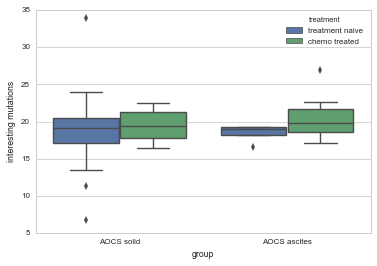

In [311]:
seaborn.boxplot(data=sources[sources.cohort == "AOCS"], x="group", y="interesting mutations", hue="treatment", hue_order=("treatment naive", "chemo treated"))


In [9]:
mutations.ix[mutations.binding_affinity > 0].shape

(9972, 42)

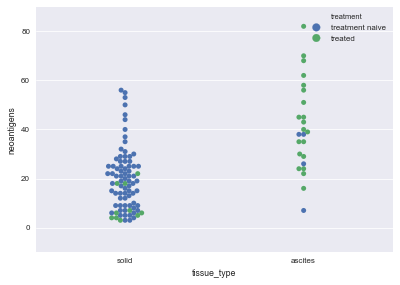

In [16]:
df = mutations.ix[~ mutations.rna_alt_reads.isnull()].ix[
    (
        (mutations.called == 1) |
        (
            (mutations.dna_alt_reads > 10)
        )
    )
    & mutations.binder
    & (mutations.rna_alt_reads > 2)
].groupby("source_id").donor.count().to_frame().reset_index()
df.index = df.source_id
#del df["source_id"]
df.columns = ["source_id", "neoantigens"]
df["donor"] = sources.donor[df.index]
df["treated"] = sources.treated[df.index]
df["treatment"] = df.treated.map({True: "treated", False: "treatment naive"})
df["tissue_type"] = sources.tissue_type[df.index]

seaborn.set_context('paper')
#seaborn.boxplot(data=df, x="tissue_type", y="neoantigens", hue="treatment")
seaborn.swarmplot(data=df, x="tissue_type", y="neoantigens", hue="treatment")


In [11]:
sum(~ mutations.rna_alt_reads.isnull())

518644

In [12]:
df

,source_id,neoantigens,donor,treated,treatment,tissue_type
source_id,,,,,,
AOCS-001-1/SP101515,AOCS-001-1/SP101515,26,AOCS-001,False,treatment naive,solid
AOCS-004-1/SP101519,AOCS-004-1/SP101519,16,AOCS-004,False,treatment naive,solid
AOCS-005-1/SP101521,AOCS-005-1/SP101521,22,AOCS-005,False,treatment naive,solid
AOCS-034-1/SP101523,AOCS-034-1/SP101523,26,AOCS-034,False,treatment naive,solid
AOCS-034-13/SP101524,AOCS-034-13/SP101524,59,AOCS-034,True,treated,ascites
AOCS-055-1/SP101526,AOCS-055-1/SP101526,37,AOCS-055,False,treatment naive,solid
AOCS-056-1/SP101528,AOCS-056-1/SP101528,7,AOCS-056,False,treatment naive,solid
AOCS-058-1/SP101532,AOCS-058-1/SP101532,19,AOCS-058,False,treatment naive,solid
AOCS-059-1/SP101536,AOCS-059-1/SP101536,10,AOCS-059,False,treatment naive,solid


In [42]:
sources

,donor,cohort,library,treated,timepoint,metastasis,tissue_type,interval_days,assay,paired,timepoint_paired,protein changing,neoantigens,expressed neoantigens,mutations,mutations_per_mb,indel,interesting mutations,group,treatment
source_id,,,,,,,,,,,,,,,,,,,,
AOCS-001-1/SP101515,AOCS-001,AOCS,WGS,False,primary,False,solid,0,WGS,False,False,50,42,25,5937,1.977682,1,19.302678,AOCS solid,treatment naive
AOCS-002-1/SP101517,AOCS-002,AOCS,WGS,False,primary,False,solid,0,WGS,False,False,11,10,NaN,1532,0.510326,0,17.297650,AOCS solid,treatment naive
AOCS-004-1/SP101519,AOCS-004,AOCS,WGS,False,primary,False,solid,0,WGS,False,False,57,31,15,6786,2.260493,1,16.931919,AOCS solid,treatment naive
AOCS-005-1/SP101521,AOCS-005,AOCS,WGS,False,primary,False,solid,0,WGS,False,False,39,32,21,5703,1.899734,2,15.640891,AOCS solid,treatment naive
AOCS-034-13/SP101524,AOCS-034,AOCS,WGS,True,recurrence,False,ascites,1597,WGS,True,True,123,92,56,13626,4.538974,5,17.906943,AOCS ascites,chemo treated
AOCS-034-1/SP101523,AOCS-034,AOCS,WGS,False,primary,False,solid,0,WGS,True,True,74,54,25,6913,2.302798,4,18.429047,AOCS solid,treatment naive
AOCS-055-1/SP101526,AOCS-055,AOCS,WGS,False,primary,False,solid,0,WGS,False,False,116,66,35,15112,5.033977,0,11.348597,AOCS solid,treatment naive
AOCS-056-1/SP101528,AOCS-056,AOCS,WGS,False,primary,False,solid,0,WGS,False,False,56,39,6,7102,2.365756,1,20.909603,AOCS solid,treatment naive
AOCS-057-1/SP101530,AOCS-057,AOCS,WGS,False,primary,False,solid,0,WGS,False,False,45,40,NaN,6201,2.065623,5,19.593614,AOCS solid,treatment naive


In [211]:
def source_display_name(name):
    return name

def abbreviated_source_display_name(name):
    return (name.split('/')[0]
            .replace("primary_", "")
            .replace("secondary_", "")
            .replace("left", "L")
            .replace("right", "R")
            .replace("pelvic_sidewalls", "sidewalls")
            .replace("end_of_care", "final"))
    
source_display_name = abbreviated_source_display_name

def series_signficance(series):    
    df = series.to_frame()
    (col,) = df.columns
    df["donor"] = sources.donor[df.index]
    df["treated"] = sources.treated[df.index]
    grouped = df.dropna().groupby(["donor", "treated"]).median().unstack().dropna()
    grouped["compare"] = (grouped[(col, False)] < grouped[(col, True)])
    
    counts = grouped["compare"].value_counts()
    print("Treated > untreated in %d of %d, p=%f. Mean change: %s absolute, percent: %s" % (
            counts.get(True, 0),
            counts.sum(),
            scipy.stats.binom_test([counts.get(True, 0), counts.get(False, 0)]),
            mean_with_errorbars(grouped[(col, True)] - grouped[(col, False)]),
            mean_with_errorbars(grouped[(col, True)] * 100.0 / grouped[(col, False)])
        ))
    counts
    
def plot_series(series, only_multiple=True, color_column='timepoint', use_hatch=False, figsize=(18,5), order='donor', legend_loc='upper right', legend=True, legend_bbox_to_anchor=None):
    if isinstance(series.tolist()[0], (list, numpy.ndarray)) and series.tolist()[0][0] in (True, False):
        df = pandas.DataFrame(collections.OrderedDict([
                ("value", [numpy.mean(x) for x in series]),
                ("low", [numpy.mean(x) - numpy.sqrt((numpy.mean(x) * (1 - numpy.mean(x)) / len(x))) for x in series]),
                ("high", [numpy.mean(x) + numpy.sqrt((numpy.mean(x) * (1 - numpy.mean(x)) / len(x))) for x in series]),
        ]), index=series.index)
        df = df * 100.0
    elif isinstance(series.tolist()[0], (list, numpy.ndarray)):
        df = pandas.DataFrame(collections.OrderedDict([
                ("value", [numpy.mean(x) for x in series]),
                ("low", [numpy.percentile(x, 5) for x in series]),
                ("high", [numpy.percentile(x, 95) for x in series]),
        ]), index=series.index)
    else:
        df = pandas.DataFrame({"value": series}, index=series.index)
    
    series_signficance(df.value)
    
    if order == 'donor':
        def sort_key(source):
            return (sources.ix[source].donor, sources.ix[source].interval_days, sources.ix[source].treated)
    elif order == 'num_sources':
         def sort_key(source):
            donor = sources.ix[source].donor
            num_treated = len([s for s in sources.index if sources.ix[s].donor == donor and sources.ix[s].treated])
            num_sources = len([s for s in sources.index if sources.ix[s].donor == donor])
            return (num_treated * -1, num_sources * -1, donor, sources.ix[source].interval_days, sources.ix[source].treated)
    else:
        raise ValueError("Unknown ordering %s" % order)
            
    sources_ordered = sorted(df.index.tolist(), key=sort_key)
    if only_multiple:
        sources_ordered = [
            s for s in sources_ordered if len(set(
                [sources.ix[other_source].treated for other_source in sources.ix[sources_ordered].ix[sources.donor == sources.ix[s].donor].index])) > 1
        ]
    
    df = df.ix[sources_ordered]

    adjacent_space = 0
    minor_space = 0
    major_space = 2
    bar_width = 2

    colors = []
    
    def color_and_hatch(info):
        color = None
        hatch = None
        primary_like = None
        if color_column == 'timepoint':
            primary_like = info['timepoint'] == "primary"    
        elif color_column == 'treated':
            primary_like = not info['treated'] == "primary"
        else:
            assert False
        
        if use_hatch:
            primary_color = seaborn.color_palette("deep")[0]
            recurrence_color = seaborn.color_palette("deep")[1]
            hatch = '/' if info['tissue_type'] == 'ascites' else None
            color = primary_color if primary_like else recurrence_color
        else:
            primary_colors = seaborn.color_palette("Blues")
            recurrence_colors = seaborn.color_palette("Greens")
            index = 3 if info['tissue_type'] == 'ascites' else -1
            color = (primary_colors if primary_like else recurrence_colors)[index]
        return (color, hatch)


    for source in sources_ordered:
        colors.append(color_and_hatch(sources.ix[source])[0])

    x_values = [bar_width]
    for (prev_source_i, source) in enumerate(sources_ordered[1:]):
        prev_source = sources_ordered[prev_source_i]
        x_increment = None
        if sources.ix[prev_source].donor != sources.ix[source].donor:
            x_increment = major_space
        elif sources.ix[prev_source].interval_days != sources.ix[source].interval_days:
            x_increment = minor_space
        else:
            x_increment = adjacent_space
        x_values.append(x_values[-1] + bar_width + x_increment)
    x_values = numpy.array(x_values)

    #seaborn.set_context("talk")
    #pyplot.figure(figsize=figsize)
    bars = pyplot.bar(
        x_values,
        df.value,
        bar_width,
        yerr=[df.value - df.low, df.high - df.value] if 'low' in df else None,
        error_kw={
            'ecolor': 'black',
            'capsize': 3,
            'elinewidth': 4
        },
        color = colors)
    for (bar, source) in zip(bars, sources_ordered):
        hatch = color_and_hatch(sources.ix[source])[1]
        if hatch is not None:
            bar.set_hatch(hatch)

    ax = pyplot.gca()
    pyplot.xticks(x_values + bar_width / 2, [source_display_name(s) for s in sources_ordered], rotation="vertical")
    pyplot.grid(False)
    ax.yaxis.grid(True, color='black', linestyle='--', linewidth=1)
    ax.patch.set_facecolor("None")
    pyplot.xlim(xmin=0, xmax=x_values.max() + bar_width + 5)

    #dummies = [ax.plot([], [], ls='-', c=c)[0] for c in color_map.values()]
    #ax.legend(dummies, [" ".join(tpl) for tpl in color_map], fontsize='xx-large', ncol=2)
    #ax.legend?

    if legend:
        class CustomLegend(object):
            def __init__(self, color, hatch=None):
                self.color = color
                self.hatch = hatch

            def legend_artist(self, legend, orig_handle, fontsize, handlebox):
                x0, y0 = handlebox.xdescent, handlebox.ydescent
                width, height = handlebox.width, handlebox.height
                patch = matplotlib.patches.Rectangle([x0, y0], width, height, facecolor=self.color,
                                           edgecolor=None, hatch=self.hatch, lw=0,
                                           transform=handlebox.get_transform())
                handlebox.add_artist(patch)
                return patch

        class PrimarySolidLegend(object):
            label = "primary solid" if color_column == 'timepoint' else "untreated solid"
            handler = CustomLegend(*color_and_hatch({'timepoint': 'primary', 'treated': False, 'tissue_type': 'solid'}))

        class RecurrenceSolidLegend(object):
            label = "recurrence solid" if color_column == 'timepoint' else "treated solid"
            handler = CustomLegend(*color_and_hatch({'timepoint': 'recurrence', 'treated': True, 'tissue_type': 'solid'}))

        class PrimaryAscitesLegend(object):
            label = "primary ascites" if color_column == 'timepoint' else "untreated ascites"
            handler = CustomLegend(*color_and_hatch({'timepoint': 'primary', 'treated': False, 'tissue_type': 'ascites'}))

        class RecurrenceAscitesLegend(object):
            label = "recurrence ascites" if color_column == 'timepoint' else "treated ascites"
            handler = CustomLegend(*color_and_hatch({'timepoint': 'recurrence', 'treated': True, 'tissue_type': 'ascites'}))

        legend_classes = [PrimarySolidLegend(), PrimaryAscitesLegend(), RecurrenceSolidLegend(), RecurrenceAscitesLegend()]


        leg = pyplot.legend(legend_classes, [x.label for x in legend_classes],
                      handler_map = dict((c, c.handler) for c in legend_classes),
                      bbox_to_anchor=legend_bbox_to_anchor,
                      loc=legend_loc, ncol=2)
        leg.set_frame_on(True)

#series = mutations_any_alt_reads.groupby("source_id")["donor"].count()
#plot_series(series, use_hatch=False)


Treated > untreated in 11 of 12, p=0.006348. Mean change: 1.7 (1.0 - 2.3) absolute, percent: 162.1 (138.6 - 187.4)
Treated > untreated in 10 of 12, p=0.038574. Mean change: 84.8 (15.8 - 151.3) absolute, percent: 135.7 (116.6 - 154.3)
Treated > untreated in 8 of 11, p=0.226563. Mean change: 54.5 (0.7 - 110.4) absolute, percent: 176.0 (120.9 - 237.8)


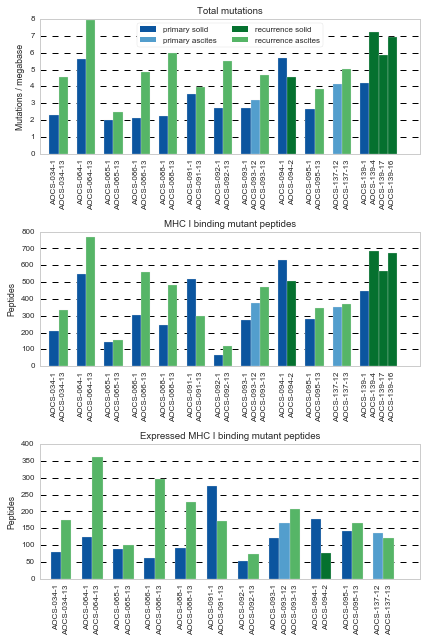

In [212]:
## Paired analyses
sub_sources = sources.ix[sources.timepoint_paired]
sub_sources = sub_sources.ix[sources.cohort == "AOCS"]

fig = pyplot.figure(figsize=(6,9))
seaborn.set_context('paper')
grid=(3,1)

ax = pyplot.subplot2grid(grid,(0, 0))
plot_series(sub_sources.mutations_per_mb.dropna(), legend_loc="upper center")
pyplot.title("Total mutations")
pyplot.ylabel("Mutations / megabase")

ax = pyplot.subplot2grid(grid,(1, 0))
plot_series(sub_sources.peptides.dropna(), legend=False)
pyplot.title("MHC I binding mutant peptides")
pyplot.ylabel("Peptides")


ax = pyplot.subplot2grid(grid,(2, 0))
plot_series(sub_sources["expressed peptides"].dropna(), legend=False)
pyplot.title("Expressed MHC I binding mutant peptides")
pyplot.ylabel("Peptides")

pyplot.tight_layout()

pyplot.savefig("../figures/paired_counts.pdf")


In [13]:
df.groupby(["tissue_type", "treatment"])["neoantigens"].mean()
df.groupby(["tissue_type", "treatment"])["source_id"].unique()

tissue_type  treatment      
ascites      treated            [AOCS-034-13/SP101524, AOCS-064-13/SP101554, A...
             treatment naive    [AOCS-093-12/SP101636, AOCS-137-12/SP101866, A...
solid        treated            [AOCS-077-1/SP101572, AOCS-094-2/SP106641, AOC...
             treatment naive    [AOCS-001-1/SP101515, AOCS-004-1/SP101519, AOC...
Name: source_id, dtype: object